In [1]:
import build.pybhjet as pybhjet
import numpy as np
import math
import matplotlib.pyplot as plt
bhjet = pybhjet.PyBHJet()

In [2]:
bhjet.load_params("ip.dat")
bhjet.set_parameter("infosw", 2)

In [3]:
bhjet.run()

: 

In [4]:
output = bhjet.get_output()

### Multi Zone Output Comparison

In [19]:
#for testing:
path_to_bhjet_output = "/Users/ruby/Models/BHJet/BHJet/Output/"
mjy = 1.e26
kevconv = 1
dist = bhjet.get_parameter("dist")
fluxconv = 4.*math.pi*(dist*3.*10**21)**2

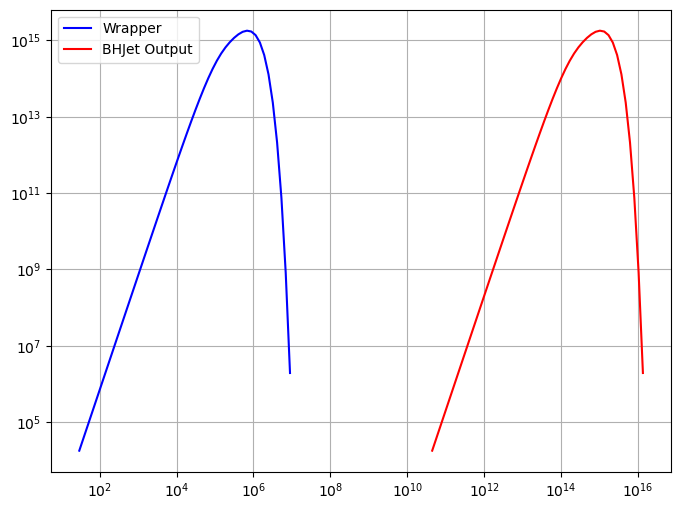

In [12]:
disk_e = np.array([point.energy for point in output.disk])
disk_f = np.array([point.flux for point in output.disk])
Disk = np.genfromtxt(path_to_bhjet_output+"Disk.dat")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(disk_e, disk_e*disk_f, linewidth=1.5, color="blue", label="Wrapper")
ax.plot(Disk.T[0],Disk.T[1]*Disk.T[0], label = "BHJet Output", color = 'red')

ax.legend()
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')

In [13]:
presyn_e = np.array([point.energy for point in output.presyn])
presyn_f = np.array([point.flux for point in output.presyn])

postsyn_e = np.array([point.energy for point in output.postsyn])
postsyn_f = np.array([point.flux for point in output.postsyn])

Presyn = np.genfromtxt(path_to_bhjet_output+"Presyn.dat")
Postsyn = np.genfromtxt(path_to_bhjet_output+"Postsyn.dat")

In [14]:
print("First Code: Presyn Data:", presyn_e[:1], presyn_f[:1])
print("Second Code: Presyn Data:", Presyn[:1])

First Code: Presyn Data: [27292905.4024245] [2.83458436e-30]
Second Code: Presyn Data: [[2.72929e+07 4.98976e-07]]


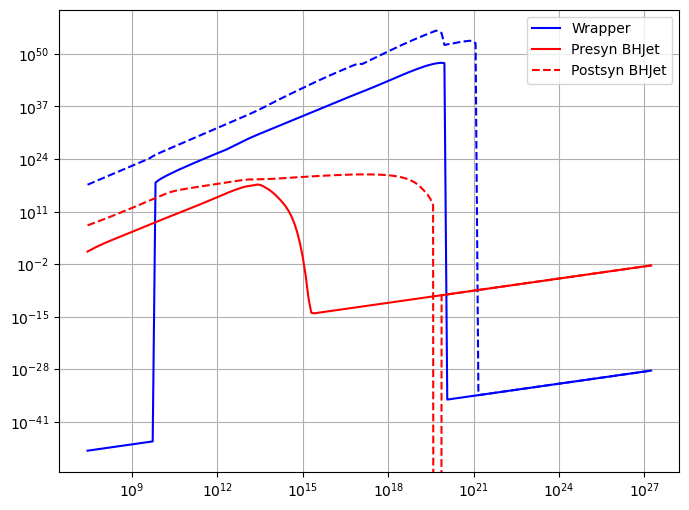

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(presyn_e, presyn_e*presyn_f/mjy, linewidth=1.5, color="blue", label="Wrapper")
ax.plot(postsyn_e, postsyn_e*postsyn_f/mjy, linewidth=1.5, color="blue", linestyle='--')

ax.plot(Presyn.T[0],Presyn.T[1]*Presyn.T[0],linewidth=1.5, label = "Presyn BHJet", color = 'red')
ax.plot(Postsyn.T[0],Postsyn.T[1]*Postsyn.T[0],linewidth=1.5, linestyle='--', label = 'Postsyn BHJet', color = 'red')

# ax.set_xlim(1e8, 1e20)
# ax.set_ylim(1e12, 1e50)
ax.legend()
ax.grid(True)

# ax.set_xlabel("Frequency ($\\rm{Hz}$)",fontsize=12)
# ax.set_ylabel("Luminosity ($\\rm{erg\,s^{-1}}$)",fontsize=12)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)


### Single Zone Example

In [58]:
bhjet.run_singlezone()

In [67]:
syn_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_Syn.dat")
com_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_SSC.dat")

energy = np.array([point.energy for point in output.cyclosyn_zones])
flux = np.array([point.flux for point in output.cyclosyn_zones])

e_compton = np.array([point.energy for point in output.compton_zones])
f_compton = np.array([point.flux for point in output.compton_zones])

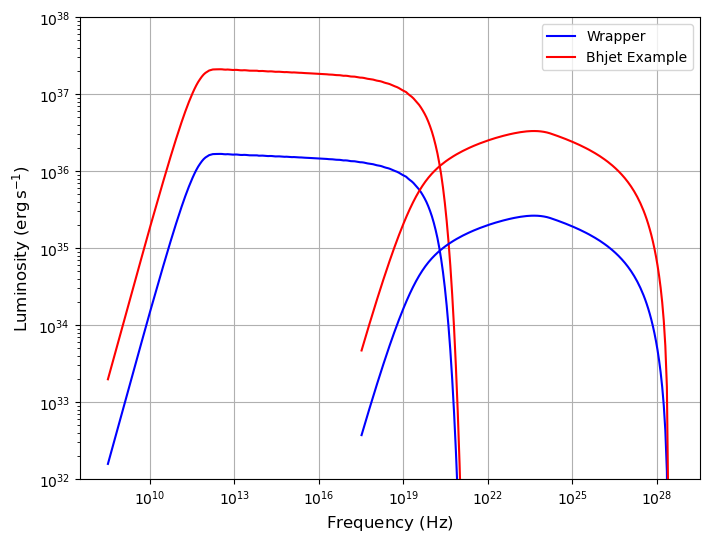

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(energy, energy*flux*mjy ,linewidth=1.5, color="blue", label="Wrapper")
ax.plot(syn_ex.T[0],syn_ex.T[0]*syn_ex.T[1],linewidth=1.5, label = "Bhjet Example", color = 'red')

ax.plot(e_compton, e_compton*f_compton*mjy, linewidth=1.5, color="blue")
ax.plot(com_ex.T[0],com_ex.T[0]*com_ex.T[1],linewidth=1.5, color = 'red')

ax.set_ylim(1e32, 1e38)
ax.legend()
ax.grid(True)

ax.set_xlabel("Frequency ($\\rm{Hz}$)",fontsize=12)
ax.set_ylabel("Luminosity ($\\rm{erg\,s^{-1}}$)",fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
